 # Project Five Unsupervised learning

# Objective:
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

# Data Description:
Data is of various customers of a bank with their credit limit, the total number of creditcards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank,
online and through a call centre. 


# Steps
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [171]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [172]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

## for euclidean distance or other distance measures
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [173]:
# reading the CSV file into pandas dataframe
bankdata = pd.read_csv("CreditCardCustData.csv")

In [174]:
# Checking for no of rows and columns in data set 
bankdata.shape

(660, 7)

In [175]:
# Initial exploration of data

bankdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [176]:
##Remove Sl_No  since it is redundant
bankdata.drop('Sl_No', axis=1, inplace=True)
##Remove Customer Key since it is redundant
bankdata.drop('Customer Key', axis=1, inplace=True)

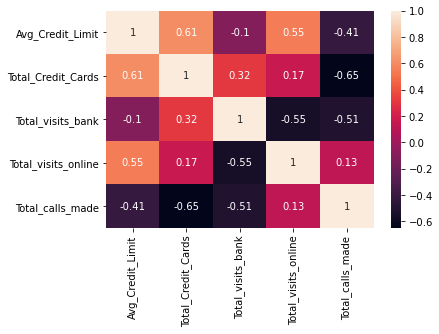

In [7]:
# Checking for the correlation between the columns 

corr = bankdata.corr()
sns.heatmap(corr, annot = True)

In [8]:
# Checking for the data types and any null value 
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [9]:
# Looking at statistal distribution of the data 

bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


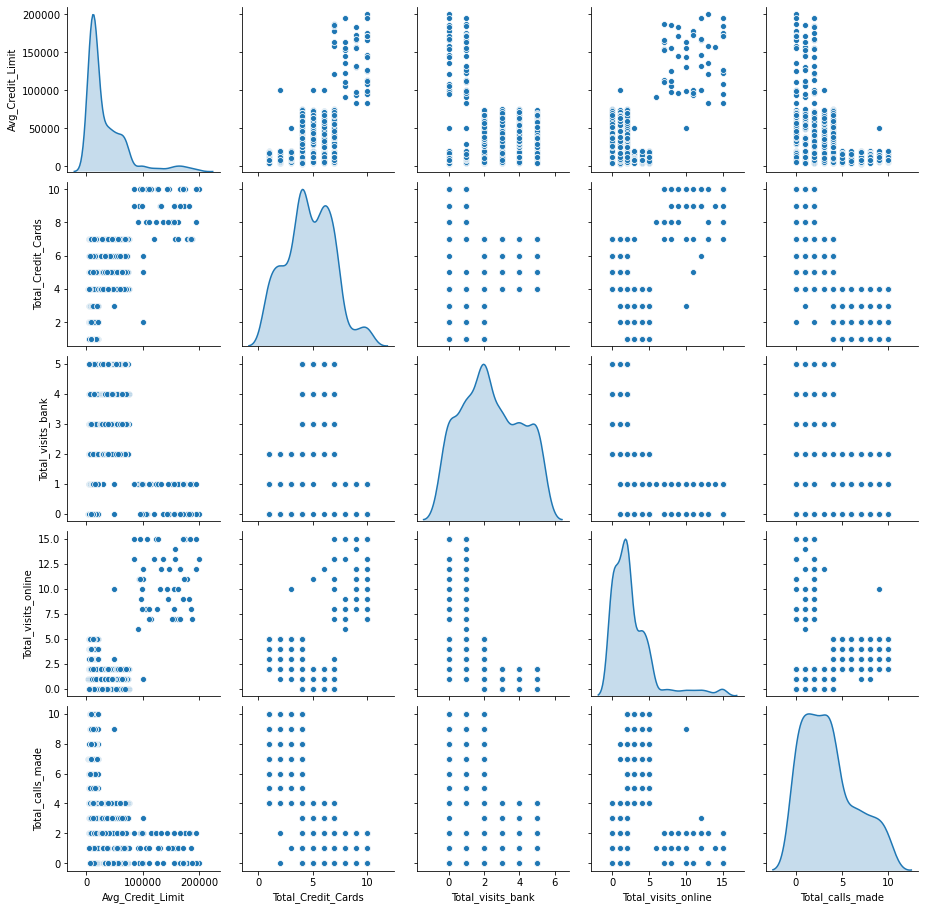

In [10]:
# Pair plot to check the data distribution and potential clusters 

import seaborn as sns
sns.pairplot(bankdata, diag_kind='kde') 

# Based on above most variables have  3 peaks but it is not very discernable in some variables like total_visits_bank ,total_visits_online  and  total_calls_made

In [11]:
# Using the Pandas profiling library for a complete and thorough analysis of the entire data set including any data corrections to be done before clustering

import pandas_profiling
pandas_profiling.ProfileReport(bankdata, title='Pandas Profiling Report')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
##Scaling the data and creating a new data set with scaled data before analysis
from scipy.stats import zscore

bankdata_z = bankdata.apply(zscore)


In [14]:
bankdata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Selecting the Right K using elbow method and Silhoutte score for K Means clustering method 

Text(0.5, 1.0, 'K  Elbow Method - Inertia ')

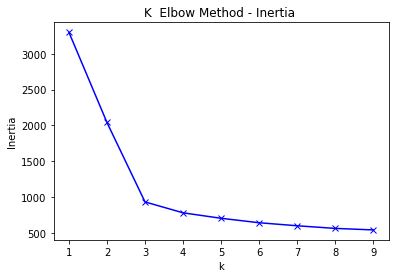

In [97]:
# Looping through a number range , fitting the model and calculating inertia . Storing inertia in array for plotting
num_clusters=range(1,10)
inertias=[]

kmeans_per_k = [KMeans(n_clusters=k).fit(bankdata_z)
                for k in num_clusters]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plotting the K againts inertia 
plt.plot(num_clusters, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('K  Elbow Method - Inertia ')

Text(0.5, 1.0, 'K Elbow Method - Distortion')

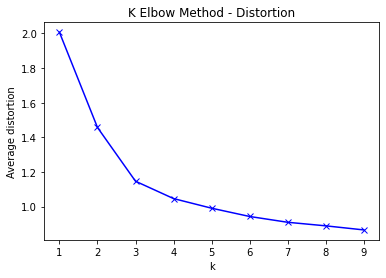

In [96]:
# Looping through a number range , fitting the model and calculating inertia . Storing Distortion in array for plotting
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(bankdata_z)
    prediction=model.predict(bankdata_z)
    meanDistortions.append(sum(np.min(cdist(bankdata_z, model.cluster_centers_, 'euclidean'), axis=1)) / bankdata_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K Elbow Method - Distortion')

### Calculating the Silhoutte Score 

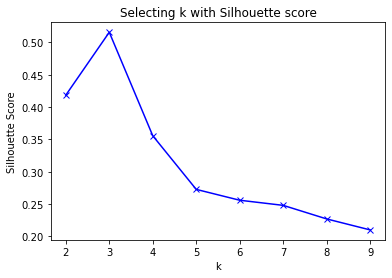

In [114]:
# Looping through a number range , fitting the model and calculating inertia . Storing Distortion in array for plotting

from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(bankdata_z, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2,10), silhouette_scores,'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Selecting k with Silhouette score')
plt.show()

### Based on Elbow method and Silhoutte score the optimal K is 3 as the Silhoutte score is also high 

In [149]:
#Set the value of k=3 based on above finding 
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2305)

In [150]:
#Fit the model  

kmeans.fit(bankdata_z)

KMeans(n_clusters=3, n_init=15, random_state=2305)

In [151]:
# Finding the centroids and printing 

centroids = kmeans.cluster_centers_

In [152]:
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488]])

In [153]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(bankdata_z) )

In [154]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1          2.831764            1.862226          -1.105763   
2         -0.021062            0.373690           0.666395   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1             2.827319         -0.874330  
2            -0.553672         -0.553005  


In [155]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
df_labels

,labels
0,2
1,0
2,2
3,2
4,1
...,...
655,1
656,1
657,1
658,1


In [156]:
# Joining the label dataframe with the data frame.
#df_labeled = bankdata_z.join(df_labels)
df_labeled = bankdata.join(df_labels)


In [157]:
df_bankdata_z_labels = bankdata_z.join(df_labels)

In [158]:
df_bankdata_z_labels.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [159]:
# the groupby creates a groupeddataframe 
df_analysis = df_labeled.groupby(['labels']).mean().round(1)
df_analysis


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.1,2.4,0.9,3.6,6.9
1,141040.0,8.7,0.6,10.9,1.1
2,33782.4,5.5,3.5,1.0,2.0


In [161]:
# Value counts in each cluster 

df_labeled['labels'].value_counts()  

2    386
0    224
1     50
Name: labels, dtype: int64

In [129]:
# Importing library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

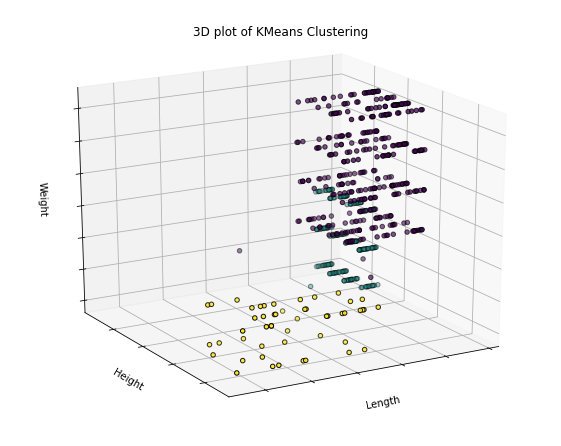

In [130]:
# Plotting with K=3 ,3D plotof cluster 

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(bankdata_z)
labels = k3_model.labels_
ax.scatter(bankdata_z.iloc[:, 0], bankdata_z.iloc[:, 1], bankdata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

#### Analysing cluster with box plot 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE6E173940>,
      dtype=object)

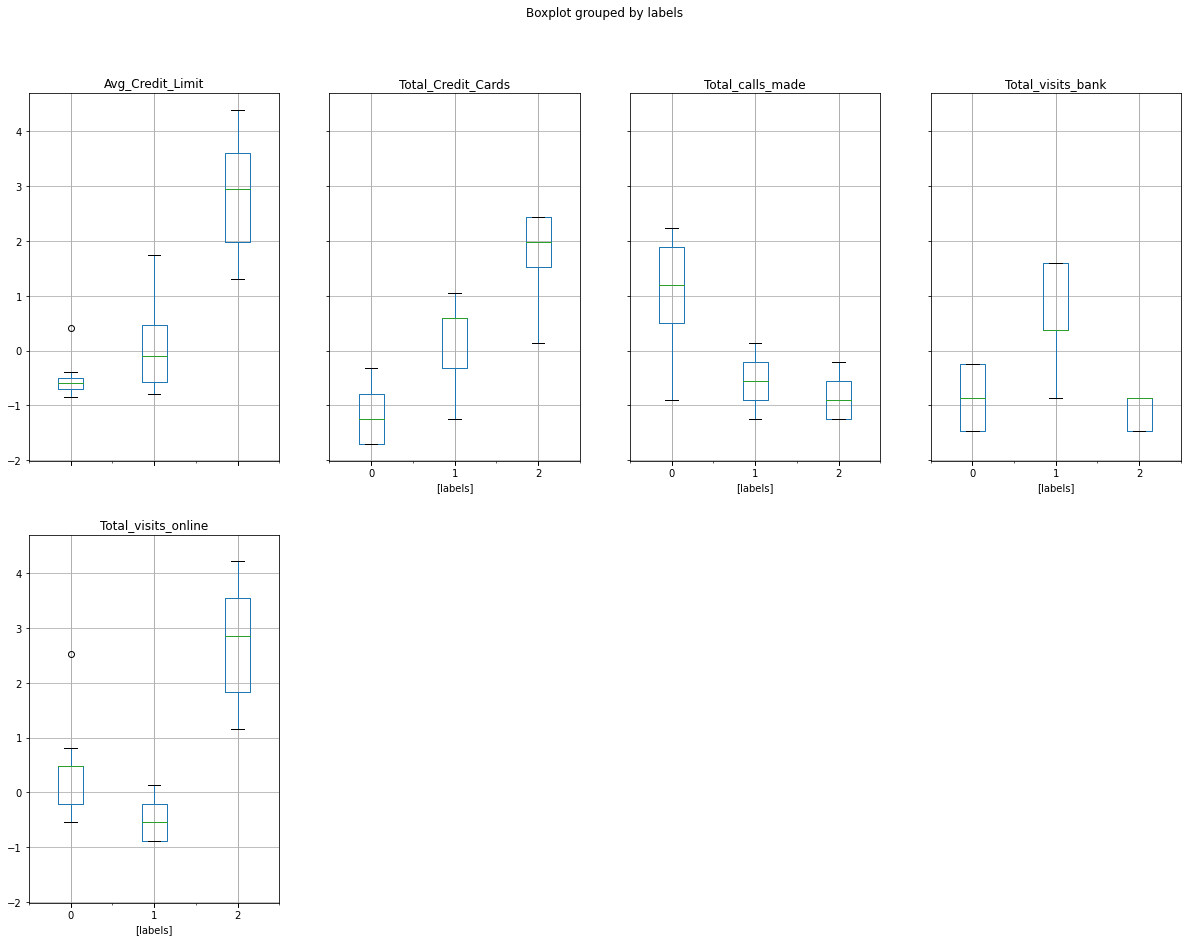

In [131]:
df_bankdata_z_labels.boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

In [132]:
grouped_data = df_labeled.groupby(['labels']).mean().round(1)
grouped_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.1,2.4,0.9,3.6,6.9
1,33782.4,5.5,3.5,1.0,2.0
2,141040.0,8.7,0.6,10.9,1.1


In [133]:
 # Importing lib for dendogram , cophenet and Pairwise distribution 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

In [135]:
 #  Agglomerative Hierarchical Clustering using average method  , calculating cophenetic distance 

Z = linkage(bankdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(bankdata_z))

c

0.8977080867389372

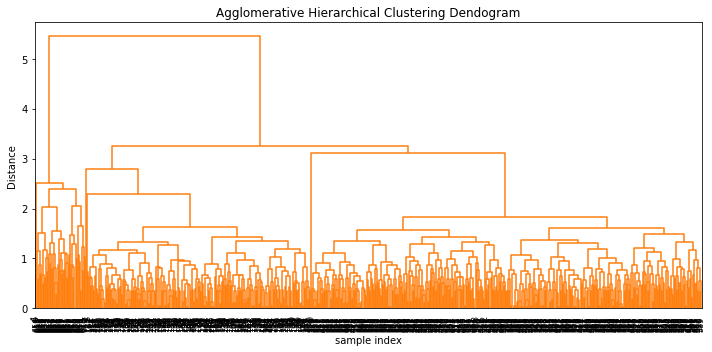

In [136]:
 #  Plotting the Dendogram 

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

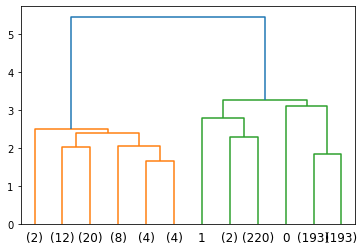

In [137]:
# Using truncate_mode='lastp' attribute in dendrogram function to see a readable dendogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [138]:
 #  Agglomerative Hierarchical Clustering using ward method  , calculating cophenetic distance 

Z = linkage(bankdata_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(bankdata_z))

c

0.7415156284827493

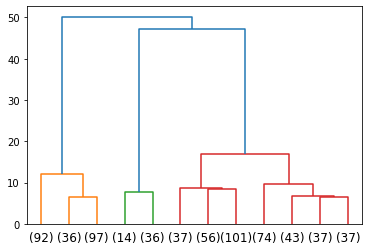

In [139]:
# Plotting the dendogram 
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [140]:
 #  Agglomerative Hierarchical Clustering using complete method  , calculating cophenetic distance 

Z = linkage(bankdata_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(bankdata_z))

c

0.8599730607972423

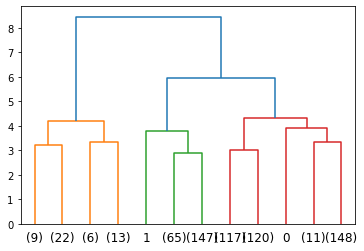

In [141]:
# Plotting the dendogram 
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [163]:
# Setting the optimal tree cut off height based on dendogram above
max_treeht = 5.5

In [164]:
# Importing the fcluster library and finding the clusters based on tree cut off height defined 
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_treeht, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [165]:
# Calculating the silhoute score based on the clusters identified above 
from sklearn.metrics import silhouette_score
silhouette_score(bankdata_z,clusters)

0.5026435522438492

Higher silhouette score is better , greater than 0.5 indicates a good fit 

In [166]:
## Creating a new data frame and adding the clusters to the main data for analysis 
df_labels1 = pd.DataFrame(clusters , columns = list(['labels']))
df_labels1['labels'] = df_labels['labels'].astype('category')
df_labeled1 = bankdata.join(df_labels1)

In [168]:
## Groupby object for analysing cluster data 

df_analysis1 = df_labeled1.groupby(['labels']).mean().round(1)
df_analysis1


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.1,2.4,0.9,3.6,6.9
1,141040.0,8.7,0.6,10.9,1.1
2,33782.4,5.5,3.5,1.0,2.0


In [169]:
## No of customers in each cluster 
df_labeled1['labels'].value_counts()  

2    386
0    224
1     50
Name: labels, dtype: int64

* Based on the above we are able to get similar clustering using K Means and Hierarchical Clustering 
* For k means the Silhoutte Score for K =3  is 0.515 which is the highest
* Using Hierarchical clustering method , when the height is set up as 5 we have 3 clusters and the Silhoutte Score is 0.502
* Using both K Means and Hierarchical clustering we have similar clustering of Customers 


Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?


Strategies for the customer segments
There are three different segments of customer Cluster 0 , Cluster 1 and Cluster 2

Promotional efforts should be focussed for the high value customers of Cluster 1 . Cluster 1 customers user experience should be focussed on retention . They also tend to have more online  visits so that should be the focus .
Cluster 2  is the next important group with a average credit limit of 33K and avg no of credit cards is 5.5 . Again customer experience for this group should be focussed as they tend to visit the bank in person more times .
Cluster 0 is where both the avg credit limit and total no of credit cards are low,but they are the ones who are making the maximum no of calls . Further analysis could be needed to find the reasons for high no of calls for relatively lower no of credit cards . There could be some customer friction points  like customers not understanding the products or they are not satisfied with the products . Bank should do an analysis and resolve the customer friction points .
For Customers in clusters  2 since they are visiting the bank more often than online or calls , the bank should find out reasons and try to divert them to  online / Call so that their experience is much quicker and better.